In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import linregress
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings 
%matplotlib inline

In [3]:
dp_1 = pd.read_csv("data\dp_1.csv")
dp_2 = pd.read_csv("data\dp_2.csv")
dp_3 = pd.read_csv("data\dp_3.csv")
final_dp = pd.read_csv("data\dp_final.csv")

# Die Elektratuto AG


Praesentation an der HWR Berlin, Sommersemester 2024

Praesentiert von: Muhammed Yasin Kilic, Fabienne Bahr 

Praesentiert am: 28.06.24

## F1: Wie viele Autos wurden verkauft?

In [4]:
# Es werden die Einträge in der Spalte "Preise" gezählt und in der Variable "Verkäufe" wiedergegeben

Verkäufe = dp_1["Preis"]. count()
Verkäufe

1104

Es wurden 1.104 Autos verkauft. 

## F3: Wie hoch war der Gesamtumsatz?

In [5]:
# Mit "sum()" den Gesamtumsatz der Spalte "Preise"

Gesamtumsatz = dp_1["Preis"]. sum(). round(3)
Gesamtumsatz

98228619.38

Unser Gesamtumsatz betraegt 98.228.619,38.

## F4: Wie viele Autos wurden pro Bundesland verkauft?

In [6]:
# DataFrame wird von "groupby" gruppiert, nach der Gruppierung wird die Spalte "Preise" ausgewählt

Verkäufe_pro_Bundesland = final_dp.groupby ("Niederlassung") ["Preis"]. count()
Verkäufe_pro_Bundesland

Niederlassung
Baden-Württemberg      205
Bayern                 188
Berlin                 126
Brandenburg             37
Hamburg                 43
Hessen                  96
Niedersachsen           96
Nordrhein-Westfalen    175
Sachsen                 89
Thüringen               49
Name: Preis, dtype: int64

Die meisten Autos haben wir in Baden-Wuerttemberg verkauft (205). Die wenigsten Autos hingegen haben wir in Brandenburg verkauft (37). 

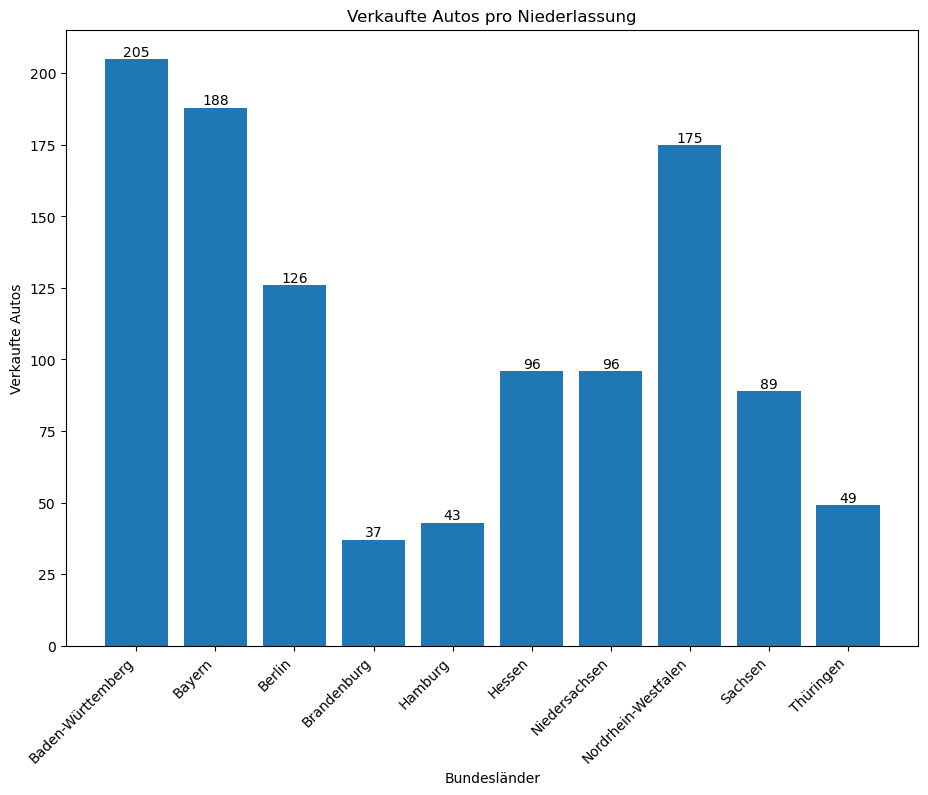

In [7]:
daten = {"Bundesland":["Baden-Württemberg", "Bayern", "Berlin", "Brandenburg", "Hamburg", "Hessen", "Niedersachsen", "Nordrhein-Westfalen", "Sachsen", "Thüringen"],
        "Verkaufte_Autos": [205, 188, 126, 37, 43, 96, 96, 175, 89, 49]}
 #Säulendiagramm erstellen
dp_saeulen_daten = pd.DataFrame(daten)

plt.figure(figsize =(11,8))
saeulen = plt.bar(dp_saeulen_daten["Bundesland"], dp_saeulen_daten["Verkaufte_Autos"])

for saeule in saeulen:
    height = saeule.get_height()
    plt.text(saeule.get_x() + saeule.get_width() / 2, height, f"{int(height)}", ha= "center", va = "bottom", fontsize = 10)
plt.title ("Verkaufte Autos pro Niederlassung")
plt.xlabel ("Bundesländer")
plt.ylabel ("Verkaufte Autos")
plt.xticks (rotation = 45, ha = "right")
plt.show()

## F5: Wie hoch war der durchschnittliche Umsatz pro Bundesland?

In [10]:
#DataFrame wird von "groupby" gruppiert, nach der Gruppierung wird die Spalte "Preise" ausgewählt

Durchschnittsumsatz_pro_Bundesland = final_dp.groupby("Niederlassung") ["Preis"].mean()
Durchschnittsumsatz_pro_Bundesland

Niederlassung
Baden-Württemberg      90969.560000
Bayern                 89344.313245
Berlin                 89584.984048
Brandenburg            86673.640811
Hamburg                85549.499070
Hessen                 85864.929479
Niedersachsen          87963.312500
Nordrhein-Westfalen    88633.265200
Sachsen                89455.080674
Thüringen              90816.994082
Name: Preis, dtype: float64

Der Durchschnittsumsatz ist in Baden-Wuerttemberg und Thueringen am hoechsten.  

## F7: Haben mehr Frauen oder Maenner unsere Autos gekauft?

In [12]:
#"groupby()" gruppiert den DataFrame nach der Spalte "Geschlecht". "Verteilung_der_Kunden.get(1,0)" Ruft Anzahl der männlichen Kunden ab (1). "Verteilung_der_Kunden.get(0,0)" Ruft Anzahl der weiblichen Kunden ab (0)

Verteilung_der_Kunden = dp_1.groupby("Geschlecht").size()
if Verteilung_der_Kunden.get (1,0) > Verteilung_der_Kunden.get(0,0):
    print ("Die Mehrheit der Kunden sind Männer!")
elif Verteilung_der_Kunden.get (1,0) < Verteilung_der_Kunden.get (0,0):
    print ("Die Mehrheit der Kunden sind Frauen!")
else: print ("Die Hälfte der Kunden sind Männer und die anderen Hälfte sind Frauen")
    
Verteilung_der_Kunden

Die Mehrheit der Kunden sind Männer!


Geschlecht
0    398
1    706
dtype: int64

Die Mehrheit unserer Kunden sind Maenner. 

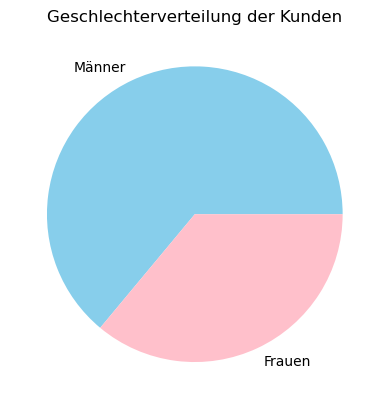

In [13]:
inhalt = ["Männer", "Frauen"]
werte = [706, 398]
plt.title("Geschlechterverteilung der Kunden")
farben_diagramm = ["skyblue", "pink"]

plt.pie(werte, labels = inhalt, colors = farben_diagramm)
plt.show()

## F13: Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen?

In [27]:
# dp_1: Nur die Zeilen werden behalten bei denen der Wert in der Spalte "Einkommen" größer ist als der Wert in der Spalte "Preis"

Kunde_ohne_Kredit = dp_1 [dp_1["Einkommen"]> dp_1["Preis"]]
Kunde_ohne_Kredit

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
157,32,50330.0,49540.28,1,27.0,K0175
407,34,24264.0,22580.44,1,19.0,K0859
499,37,54403.0,53690.36,0,47.0,K0364
642,32,30856.0,27934.83,1,18.0,K0447
696,31,36296.0,35482.61,0,31.0,K0143


Nur 5 unserer Kunden haben fuer den Autokauf keinen Bankkredit aufgenommen.

## F9 Teil 1: Wie hoch ist das Durchschnittseinkommen unserer Kunden?

In [20]:
# Mit dem Befehl "mean()" bekommen wir den Durchschnitt
# Mit dem Befehl "round(2)" wird die Zahl gerundet auf Zwei Stellen

Kunden_Durchschnittseinkommen = dp_1 ["Einkommen"].mean().round(2)
Kunden_Durchschnittseinkommen

58895.0

Das Durchschnittseinkommen unserer Kunden liegt bei 58.895.

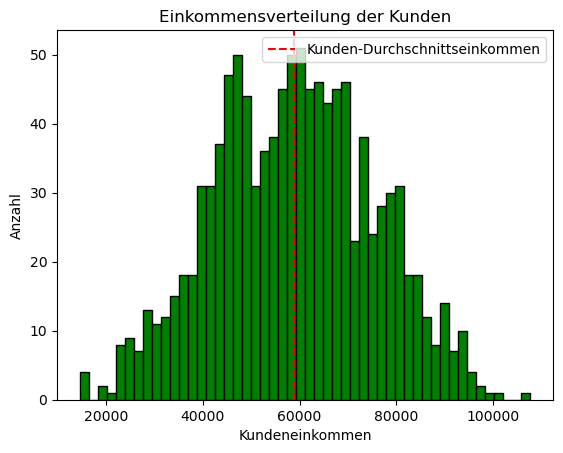

In [21]:
plt.hist(dp_1["Einkommen"], bins=50, color = "green", edgecolor = "black")
plt.axvline(x=Kunden_Durchschnittseinkommen, color = "red", linestyle = "--", label = "Kunden-Durchschnittseinkommen")

plt.xlabel("Kundeneinkommen")
plt.ylabel("Anzahl")
plt.title("Einkommensverteilung der Kunden")
plt.legend()

plt.show()

## F9 Teil 2: Wie hoch ist das Durchschnittseinkommen unserer Besucher?

In [22]:
# Mit dem Befehl "mean()" bekommen wir den Durchschnitt 
# Mit dem Befehl "round(2)" wird die Zahl gerundet auf Zwei Stellen

Besucher_Durchschnittseinkommen = dp_2 ["Einkommen"].mean().round(2)
Besucher_Durchschnittseinkommen

59367.94

Das Durchschnittseinkommen unserer Besucher liegt bei 59.367,94.

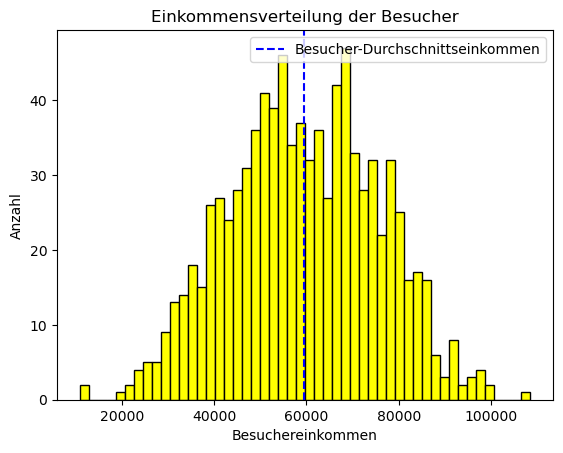

In [23]:
plt.hist(dp_2["Einkommen"], bins=50, color = "yellow", edgecolor = "black")
plt.axvline(x=Besucher_Durchschnittseinkommen, color = "blue", linestyle = "--", label = "Besucher-Durchschnittseinkommen")

plt.xlabel("Besuchereinkommen")
plt.ylabel("Anzahl")
plt.title("Einkommensverteilung der Besucher")
plt.legend()

plt.show()

## F10: Gibt es einen statistisch signifikanten Unterschied zwischen dem Durchschnittseinkommen der Kunden und dem Durchschnittseinkommen der Besucher?

In [24]:
#Einkommensdaten extrahieren
Kunden_Einkommen = dp_1["Einkommen"]
Besucher_Einkommen = dp_2["Einkommen"]

#Zweistichproben-t-Test durchführen, stats.ttest_ind() wird mit dem Parameter 
#equal_var = True durchgeführt, da die Varianzen als gleich angenommen werden.
t_stat, p_value = stats.ttest_ind(Kunden_Einkommen, Besucher_Einkommen, equal_var = True)

print(f"T-Statistik: {t_stat}")
print(f"P-Wert: {p_value}")

#Entscheidung basierend auf dem Signifikanzniveau
alpha = 0.05

if p_value < alpha:
    print ("Es ist ein statistisch signifikanter Unterschied vorhanden")
else:
    print("Es ist kein statistisch signifikanter Unterschied vorhanden")

T-Statistik: -0.6420637509582324
P-Wert: 0.5209056330349291
Es ist kein statistisch signifikanter Unterschied vorhanden


Wir konnten keinen statistisch signifikanten Unterschied zwischen dem Durchschnittseinkommen unserer Kunden und dem unserer Besucher feststellen. 

## F2: Hoechst-, Mindest- und Durchschnittspreis

### Durchschnittspreis

In [5]:
# Durchschnittswert für die Spalte "Preis", "mean()" für den Durchschnittswert, round (2) rundet auf zwei Dezimalstellen

Durchschnittspreis = dp_1["Preis"].mean(). round(2)
Durchschnittspreis

88975.2

Der Durchschnittspreis unserer Autos betraegt 88.975,2.

### Hoechstpreis

In [6]:
# Höchstpreis für die Spalte "Preis", "max()" für den höchsten Preis

Höchstpreis = dp_1["Preis"]. max()
Höchstpreis

165482.31

Der Hoechstpreis unter unseren Autos betraegt 165.482,31.

### Mindestpreis

In [7]:
# Mindestpreis für die Spalte "Preis", "min()" für den geringsten Preis

Mindestpreis = dp_1["Preis"]. min()
Mindestpreis

21471.65

Der Mindestpreis unter unseren Autos betraegt 21.471,65.

## F6: In welchem Bundesland wurde das teuerste Auto verkauft?

In [11]:
# "idxmax()" gibt den teuersten Wert in der Spalte "Preis" an. loc wird verwendet um den Wert in der Spalte "Niederlassung" an dem gefundenen Index abzurufen

Teuerstes_auto_index = final_dp["Preis"].idxmax()
Teuerstes_auto_bundesland = final_dp.loc[Teuerstes_auto_index,"Niederlassung"]
Teuerstes_auto_bundesland

'Niedersachsen'

Das teuerste Auto haben wir Niedersachsen verkauft. 

## F8 Teil 1: Wie hoch ist das Durchschnittsalter unserer Kunden?

In [14]:
# Mit dem Befehl "mean()" bekommen wir den Durchschnitt
# Mit dem Befehl "round(2)" wird die Zahl gerundet auf zwei Stellen

Kunden_Durchschnittsalter_1 = dp_1["Alter"].mean().round(2)
Kunden_Durchschnittsalter_1

50.38

Das Durchschnittsalter unserer Kunden betraegt 50,38 Jahre. 

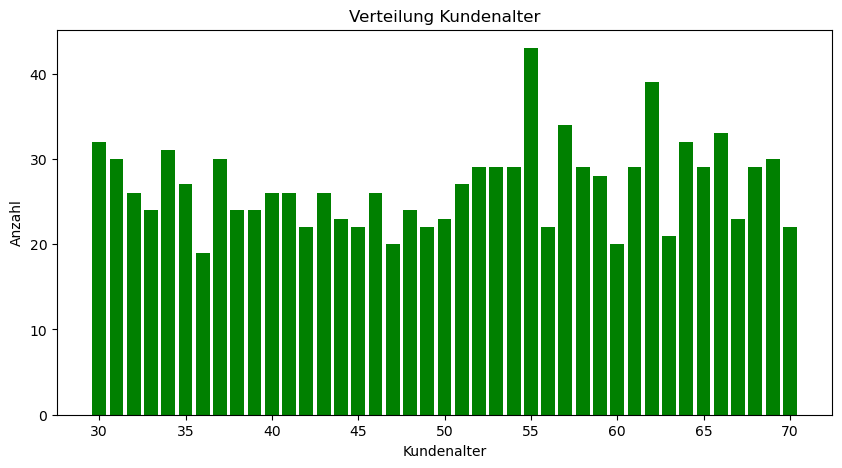

In [16]:
Häufigkeiten1_sortiert = dp_1["Alter"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(Häufigkeiten1_sortiert.index, Häufigkeiten1_sortiert, color = "green")

plt.title("Verteilung Kundenalter")
plt.xlabel("Kundenalter")
plt.ylabel("Anzahl")

plt.show()

## F8 Teil 2: Wie hoch ist das Durchschnittsalter unserer Besucher?

In [17]:
# Mit dem Befehl "mean()" bekommen wir den Durchschnitt
# Mit dem Befehl "round(2)" wird die Zahl gerundet auf Zwei Stellen

Besucher_Durchschnittsalter_2 = dp_2["Alter"].mean().round(2)
Besucher_Durchschnittsalter_2

49.88

Das Durchschnittsalter unserer Besucher liegt bei 49,88 Jahren. Es liegt somit kaum unter dem der Kunden.

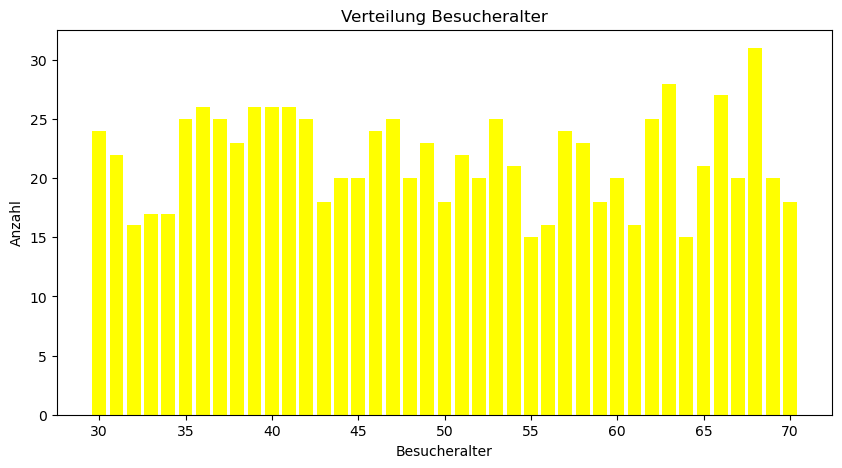

In [19]:
Häufigkeiten2_sortiert = dp_2["Alter"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(Häufigkeiten2_sortiert.index, Häufigkeiten2_sortiert, color = "yellow")

plt.title("Verteilung Besucheralter")
plt.xlabel("Besucheralter")
plt.ylabel("Anzahl")

plt.show()

## F11: Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit?

In [25]:
# Erstellung eines neuen DataFrames "dp_01 mit den Variablen Alter, Einkommen, Preis und Zeit. Der Befehl .corr() berechnet die Korrelation.

dp_01 = dp_1 [["Alter","Einkommen","Zeit","Preis"]]
dp_01.corr()

,Alter,Einkommen,Zeit,Preis
Alter,1.000000,0.762055,0.589595,0.780937
Einkommen,0.762055,1.000000,0.776198,0.896557
Zeit,0.589595,0.776198,1.000000,0.707778
Preis,0.780937,0.896557,0.707778,1.000000


Die Korrelation zwischen den Variablen Einkommen und Preis ist am hoechsten (0.896557), gefolgt von Alter und Preis (0.780937), dann Einkommen und Zeit (0.776198), Einkommen und Alter (0.762055), Preis und Zeit (0.707778) und schliesslich Alter und Zeit (0.589595). 

## F12: Ist die Variable Zeit approximativ normalverteilt? (Kunden und Besucher zusammen, qq-Plot)

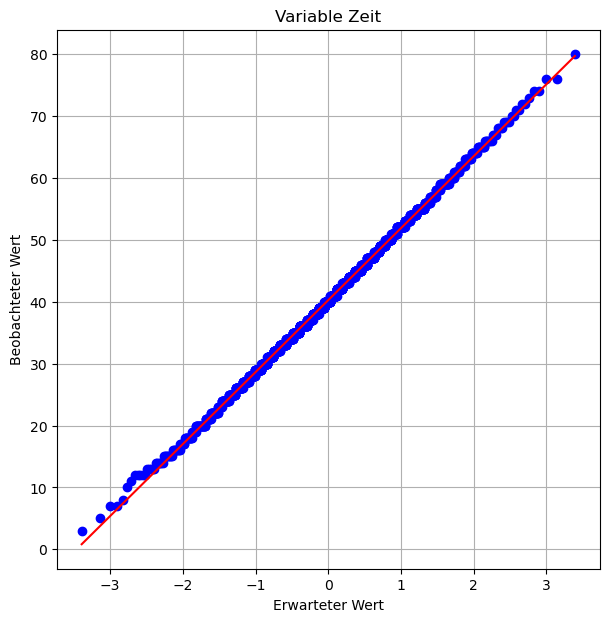

In [10]:
Zeit = final_dp ["Zeit"] #Variable Zeit extrahieren

#Erstellung eines qq-Plots:
plt.figure (figsize=(7,7)) #Bestimmt die Größe
stats.probplot(Zeit, dist = "norm", plot=plt) #Erstellt qq-Plot
plt.title ("Variable Zeit") # Titelbeschriftung
plt.ylabel("Beobachteter Wert") #Y-Achse Beschriftung
plt.xlabel("Erwarteter Wert") #X-Achse Beschriftung
plt.grid (True) # Fügt ein Gitter hinzu
plt.show()

Die Variable Zeit scheint approximativ normalverteilt zu sein. 

## F14: Welche sind die soziooekonomischen Merkmale, die den Kaufpreis der Kunden beeinflussen?

In [11]:
# "smf.ols("Preis" ~ "Alter" + "Geschlecht" + "Einkommen", data = merged_dp)" definiert das lineare Regressionsmodell mit Preis als abhängiger Variable und den Rest als unabhängige Variable.

model_1 = smf.ols("Preis ~ Alter + Geschlecht + Einkommen", data = final_dp)
result = model_1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1769.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:11:05   Log-Likelihood:                -11749.
No. Observations:                1104   AIC:                         2.351e+04
Df Residuals:                    1100   BIC:                         2.353e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    896.3274   1389.783      0.645      0.5

Das soziooekonomische Merkmal Geschlecht scheint einen grossen Einfluss auf den Kaufpreis zu haben, waehrend die Variable Alter einen kleineren Einfluss zu haben scheint und Einkommen einen geringen Einfluss.

## F15: Prognostizieren des Kaufpreises fuer (m,32,30.000€) & (m,51,54.000€)

In [29]:
#Daten vorbereiten = Entfernen von Zeilen, wo der Preis fehlt
model_data = final_dp.dropna(subset=["Preis"]) 

#Features auswählen, in dem Fall Alter, Einkommen, Geschlecht
features = ["Alter", "Einkommen", "Geschlecht"]
X = model_data [features] # X erhält ausgewählte Features
y = model_data ["Preis"] #Y ist die abhängige Variable Preis


#Konstante hinzufügen
X = sm.add_constant(X)

#Erstellung einer Linearen Regression
model = sm.OLS(y,X)
result = model.fit() #Passt das Modell an die Daten an

#Szenarien vorbereiten , die selbe Reihenfolge bei den Zahlen wie bei den columns benutzen
szenario_1 = pd.DataFrame ([[1,32,30000,1]], columns = ["const", "Alter", "Einkommen", "Geschlecht"])
szenario_2 = pd.DataFrame ([[1,51,54000,1]], columns = ["const", "Alter", "Einkommen", "Geschlecht"])

# Für die Szenarien Vorhersagen treffen
Vorhersage_1 = result.predict(szenario_1)
Vorhersage_2 = result.predict(szenario_2)

### Person 1

In [30]:
#Ergebniss Vorhersage 1
"Ergebnis für m,32,30000", Vorhersage_1

('Ergebnis für m,32,30000',
 0    50244.710947
 dtype: float64)

Der prognostizierte Kaufpreis fuer Person 1 betraegt 50.244,710947.

### Person 2

In [31]:
#Ergebniss Vorhersage 2
"Ergebnis für m,51,54000", Vorhersage_2

('Ergebnis für m,51,54000',
 0    84845.681408
 dtype: float64)

Der prognostizierte Kaufpreis fuer Person 2 betraegt 84.845,681408.

## F16: Welche Variable beeinflusst den Preis des Autos am meisten?

In [32]:
dp_16 = dp_1 [["Alter", "Einkommen", "Geschlecht", "Preis"]]

#Standardisierung einfügen, Auswahl der Spalten mit numerischen Datentyp, Entfernen aller Zeilen, die mind. einen fehlenden Wert enthalten
dp_standart = dp_16.select_dtypes(include = [np.number]).dropna().apply(stats.zscore)

#Regression einfügen
formel = "Preis ~ Alter + Einkommen + Geschlecht"
result = smf.ols(formel, data=dp_standart).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1769.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:19:28   Log-Likelihood:                -593.75
No. Observations:                1104   AIC:                             1196.
Df Residuals:                    1100   BIC:                             1216.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.857e-16      0.012  -3.89e-14      1.000      -0.025       0.025
Alter          0.2347      0.019     12.161      0.000       0.197       0.273
Einkommen      0.7163      0.019     37.095      0.000       0.678       0.754
Geschlecht     0.0419      0.013      3.352      0.001       0.017       0.066
==============================================================================
Omnibus:                        1.239   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.244
Skew:                           0.016   Prob(JB):                        0.537
Kurtosis:                       2.839   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Die Variable Einkommen scheint den Kaufpreis am meisten zu beeinflussen.

## F17: Schaetzung der Regression, die die Wahrscheinlichkeit des Kaufes eines Autos ermittelt

In [33]:
#Erste Zeile Anzeigen lassen für die Reihenfolge
final_dp.head(1)

# Logisches Regressionsmodell "smf.logit()", Kunde ist die Abhängige Variable, "fit()" passt Modell an Daten an
Regression = smf.logit("Kunde ~ Alter + Einkommen + Geschlecht + Zeit", data =final_dp).fit()
Regression

Regression.summary()

Optimization terminated successfully.
         Current function value: 0.578993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Kunde   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1990
Method:                           MLE   Df Model:                            4
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.1578
Time:                        14:19:33   Log-Likelihood:                -1155.1
converged:                       True   LL-Null:                       -1371.4
Covariance Type:            nonrobust   LLR p-value:                 2.395e-92
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4436      0.263     -9.275      0.000      -2.960      -1.927
Alter          0.0181      0.007      2.641      0.008       0.005       0.032
Einkommen  -4.218e-05   5.43e-06     -7.768      0.000   -5.28e-05   -3.15e-05
Geschlecht     0.2467      0.103      2.395      0.017       0.045       0.449
Zeit           0.1022      0.006     17.531      0.000       0.091       0.114
==============================================================================
"""

Die Variablen Alter, Geschlecht und Zeit bedingen die Wahrscheinlichkeit des Autokaufs. 

## F18: Wie hoch ist die Wahrscheinlichkeit, dass ein Autokauf mit m1 und m2 zu stande kommt? (m,32,30.000€,30min) & (m,51,54.000€,45min)

### Person 1

In [34]:
#Für die Person 1 muss zunächst ein DataFrame erstellt werden.
Person_1 = pd.DataFrame({"Alter":[32], "Einkommen": [30000], "Geschlecht": [1], "Zeit": [30]})

#Wahrscheinlichkeit vorhersagen
Kaufwahrscheinlichkeit = Regression.predict(Person_1)

("Wahrscheinlichkeit das Auto gekauft wird:", Kaufwahrscheinlichkeit.values[0])

('Wahrscheinlichkeit das Auto gekauft wird:', 0.5457047833936952)

Die Kaufwahrscheinlichkeit liegt fuer Person 1 bei ca. 55%. 

### Person 2

In [35]:
#Für die Person 2 muss auch ein DataFrame erstellt werden.
Person_2 = pd.DataFrame({"Alter":[51], "Einkommen": [54000], "Geschlecht": [1], "Zeit": [45]})

#Wahrscheinlichkeit vorhersagen
Kaufwahrscheinlichkeit = Regression.predict(Person_2)

("Wahrscheinlichkeit das Auto gekauft wird:", Kaufwahrscheinlichkeit.values[0])

('Wahrscheinlichkeit das Auto gekauft wird:', 0.7404314090975102)

Die Kaufwahrscheinlichkeit liegt fuer Person 2 bei ca. 74%.

## F19: Probleme 

### 1. Es haben Daten gefehlt.

Alter         0
Einkommen     0
Preis         0
Geschlecht    5
Zeit          0
KundeNr       0

Es fehlten 5 Daten in der Spalte "Geschlecht". Die fehlenden Werte werden mit 1 aufgefuellt:

dp_1["Geschlecht"] = dp_1["Geschlecht"].fillna(1)

### 2. Spalte "Alter" hat 2 sehr hohe Werte 100 und 120, welche beide 1x vorkamen Altergruppe 55 traten sehr haeufig in Erscheinung, deshalb haben wir jede Zahl über 100 druch die 55 ersetzt.

Alter 55 41 62 39 57 34 66 33 64 32 30 32 34 31 69 30 37 30 31 30 52 29 54 29 58 29 65 29 53 29 61 29 68 29 59 28 35 27 51 27 41 26 40 26 43 26 32 26 46 26 39 24 48 24 38 24 33 24 44 23 50 23 67 23 42 22 70 22 56 22 45 22 49 22 63 21 60 20 47 20 36 19

##### 100 1
##### 120 1

dp_1["Alter"] = dp_1["Alter"]. apply(lambda x: 55 if x >= 100 else x)

### 3. Spalte "Einkommen" hatte sehr hohe positive und negative Zahlen und auch Werte von 0. Wir haben uns für den Wert Median entschieden und alle zu hohen oder niedrigen werde gegen den Median ausgetauscht.

median_einkommen = dp_1["Einkommen"].median()

dp_1["Einkommen"] = dp_1["Einkommen"].apply(lamda x: median_einkommen if x <= 0 or x >= 1000000 else x)

### 4. Die Datentypen der Datensaetze haben nicht uebereingestimmt

dp_1.dtypes
Alter           int64
Einkommen     float64
Preis         float64
Geschlecht    float64
Zeit          float64
KundeNr        object
dtype: object

dp_2-dtypes
Alter          int64
Einkommen     object
Geschlecht     int64
Zeit          object
KundeNr       object
dtype: object

Die Datentypen muessen uebereinstimmen, damit keine Fehler auftreten. Diese wurden entsprechend geaendert:

dp_1["Geschlecht"] = dp_1["Geschlecht"].astype("int64")

dp_2["Einkommen"] = pd.to_numeric(dp_2["Einkommen"].str.replace(',','.'), errors = "coerce")
dp_2["Zeit"] = pd.to_numeric(dp_2["Zeit"].str.replace(',','.'), errors = "coerce")

Der Befehl "coerce" setzt fuer Elemente, die nicht veraendert werden koennen, ein "NaN" ein. Dadurch kommen keine Fehlermeldungen.

### 5. Die Bundeslaender haben verschiedene Schreibweisen. Es werden verschiedene Bezirke benutzt und Abkuerzungen.

final_dp["Niederlassung"].unique()
array(['Bayern', 'Berlin', 'Baden-Wuerttemberg', 'Hessen', 'Thueringen',
      'Sachsen', 'Nordrhein-Westfalen', 'BERLIN', 'Niedersachsen',
      'Hamburg', 'Brandenburg', 'Berlin-Mitte', 'Duesseldorf', 'NRW',
       'Berlin-Charlottenburg'], dtype=object)

Die Bundeslaender wurden einheitlich gemacht und zusammengefuehrt:

final_dp["Niederlassung"] = final_dp ["Niederlassung"].replace("Duesseldorf", "Nordrhein-Westfalen")
final_dp["Niederlassung"] = final_dp ["Niederlassung"].replace("BERLIN", "Berlin")
final_dp["Niederlassung"] = final_dp ["Niederlassung"].replace("Berlin-Charlottenburg", "Berlin")
final_dp["Niederlassung"] = final_dp ["Niederlassung"].replace("Berlin-Mitte", "Berlin")
final_dp["Niederlassung"] = final_dp ["Niederlassung"].replace("NRW", "Nordrhein-Westfalen")

Das Ergebniss sah wie folgt aus:

array(['Bayern', 'Berlin', 'Baden-Wuerttemberg', 'Hessen', 'Thueringen',
       'Sachsen', 'Nordrhein-Westfalen', 'Niedersachsen', 'Hamburg',
       'Brandenburg'], dtype=object)

## F20: Vorschlaege für die Kundenabteilung

Ein Unternehmen moechte immer online gut vertreten sein.

Vorschlag 1: Umfrage an die Kunden, ueber welche Medien sie auf das Auto oder unser Unternehmen aufmerksam geworden sind und ob dies ihre Kaufentscheidung beeinflusst hat.

Ein Unternehmen moechte auch immer, dass die Kunden zufrieden sind, damit sie Kunden bleiben und erneut bei ihnen einkaufen.

Vorschlag 2: Umfrage an die Kunden, wie ihnen die Servicequalitaet gefallen hat und wie zufrieden sie mit der Beratung sind, z.B. in einer Skala von 1-10.

# Vielen Dank fuer Ihre Aufmerksamkeit!